# Training notebook

## 0. Libraries and dataset

In [2]:
import utils
import model
import torch

In [3]:
torch.cuda.is_available()

True

In [4]:
# set dataset name
dataset_name = 'blackwhite'

## 1. Instantiate dataloaders

In [5]:
# instantiate datasets and dataloaders
datasets = {mode: utils.ImageDataset(dataset_name = dataset_name, transform=utils.data_transforms[mode], mode = mode) for mode in ['train', 'val']}
dataloaders = {mode: utils.DataLoader(datasets[mode], batch_size=4, shuffle=True) for mode in ['train', 'val']}

## 2. Original pix2pix

As implemented by the authors of the paper.

### 2.1. Create model

In [ ]:
# instantiate model
p2p = model.Pix2Pix().to(utils.device)

### 2.2. Train

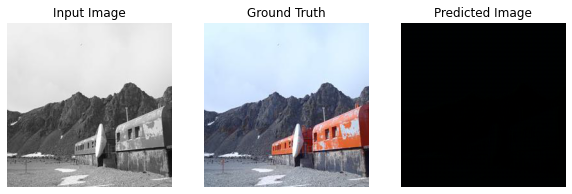

Epoch 1/5
----------
gen_loss: 8.4943, gan_loss: 1.8941, l1_loss: 0.0660, disc_loss: 0.4167.


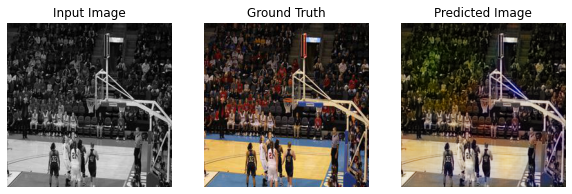



Epoch 2/5
----------
gen_loss: 9.7826, gan_loss: 3.7320, l1_loss: 0.0605, disc_loss: 0.2269.


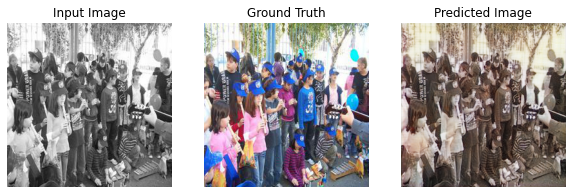



Epoch 3/5
----------
gen_loss: 10.9962, gan_loss: 5.0913, l1_loss: 0.0590, disc_loss: 0.1241.


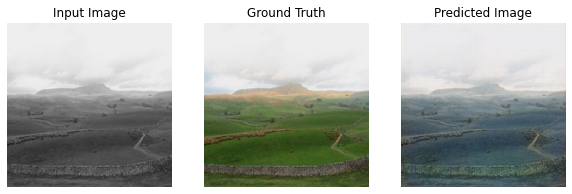



Epoch 4/5
----------
gen_loss: 11.4860, gan_loss: 5.5422, l1_loss: 0.0594, disc_loss: 0.0871.


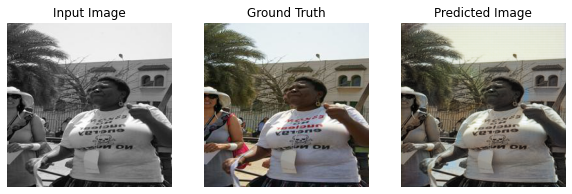



Epoch 5/5
----------
gen_loss: 11.9902, gan_loss: 6.0732, l1_loss: 0.0592, disc_loss: 0.0588.


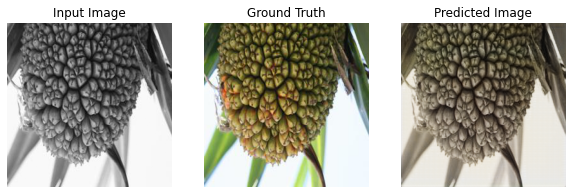

saving model weights ...


Training complete in 28m 15s


In [6]:
#training 
history = utils.train(model = p2p, 
            n_epochs = 5, 
            display_step = 1, 
            save_step = 5,
            dataloaders = dataloaders, 
            filename = 'blackwhite_b53_notransfo',
            lr = 2e-4, 
            lbd = 100,
            betas = (0.2, 0.999)) 

In [ ]:
#plot losses and save losses images
utils.plot_and_save_history(history, filename = 'blackwhite_b53_notransfo', title = 'blackwhite_b53_notransfo')

### 2.3 Testing

In [ ]:
n = 10
i = 0
for input_val, real_val in dataloaders['val']:
    i += 1
    utils.generate_images(model = p2p, input = input_val, real = real_val)
    if i == n: break

## 3. Enhanced pix2pix

## 3.1. Pre-train the generator

In [ ]:
net_G = utils.build_res_unet(n_input=3, n_output=3, size=256)
utils.pretrain_generator(net_G, dataloaders, 1)
torch.save(net_G.state_dict(), "weights/res18-unet.pt")

100%|██████████| 100/100 [00:05<00:00, 18.87it/s]


Epoch 1/1
L1 Loss: 0.12183


## 3.2. (Load and) Plug new generator in Pix2Pix

In [ ]:
#net_G = utils.build_res_unet(n_input=3, n_output=3, size=256) #to load pre-trained generator weights
#net_G.load_state_dict(torch.load("weights/res18-unet.pt", map_location=utils.device)) #to load pre-trained generator weights

p2p = model.Pix2Pix(generator = net_G).to(utils.device) #to load pre-trained generator weights
#p2p.load_state_dict(torch.load("weights/blackwhite_b33_notransfo_ep10.pkl", map_location=utils.device)) #to load pix2pix weights if model already trained

## 3.3. Train new model

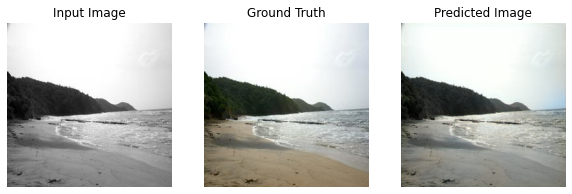

Epoch 1/20
----------
gen_loss: 6.9471, gan_loss: 1.0360, l1_loss: 0.0591, disc_loss: 0.5645.


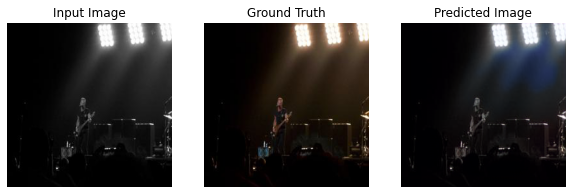



Epoch 2/20
----------
gen_loss: 6.8122, gan_loss: 1.0322, l1_loss: 0.0578, disc_loss: 0.5870.


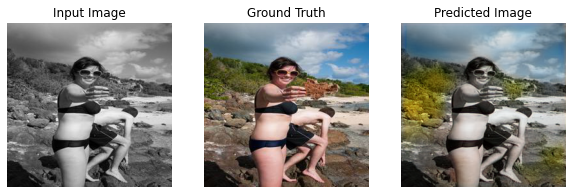



Epoch 3/20
----------
gen_loss: 6.8979, gan_loss: 1.0902, l1_loss: 0.0581, disc_loss: 0.5559.


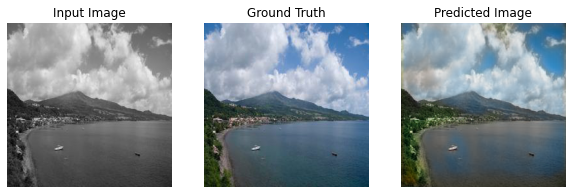



Epoch 4/20
----------
gen_loss: 6.7961, gan_loss: 1.0587, l1_loss: 0.0574, disc_loss: 0.5750.


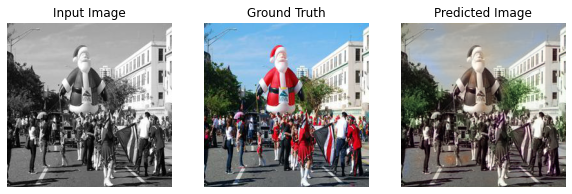



Epoch 5/20
----------
gen_loss: 6.6104, gan_loss: 1.0071, l1_loss: 0.0560, disc_loss: 0.6110.


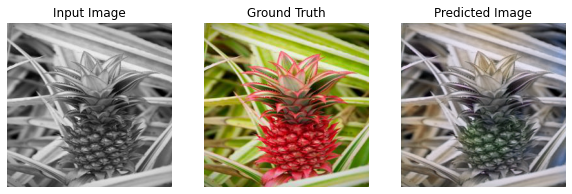



Epoch 6/20
----------
gen_loss: 6.5848, gan_loss: 0.9919, l1_loss: 0.0559, disc_loss: 0.6208.


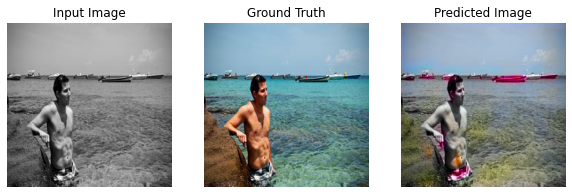



Epoch 7/20
----------
gen_loss: 6.4672, gan_loss: 0.9857, l1_loss: 0.0548, disc_loss: 0.6107.


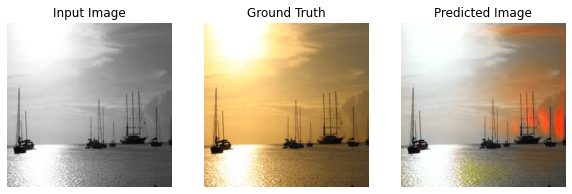



Epoch 8/20
----------
gen_loss: 6.2813, gan_loss: 0.9782, l1_loss: 0.0530, disc_loss: 0.6072.


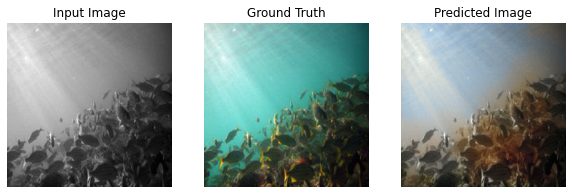



Epoch 9/20
----------
gen_loss: 6.3416, gan_loss: 1.0366, l1_loss: 0.0531, disc_loss: 0.5999.


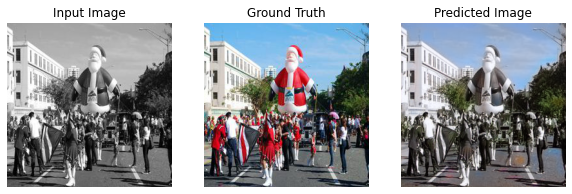



Epoch 10/20
----------
gen_loss: 6.1858, gan_loss: 0.9731, l1_loss: 0.0521, disc_loss: 0.6173.


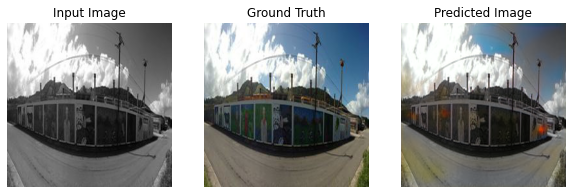



Epoch 11/20
----------
gen_loss: 6.1406, gan_loss: 0.9688, l1_loss: 0.0517, disc_loss: 0.6051.


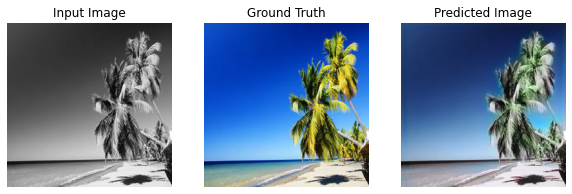



Epoch 12/20
----------
gen_loss: 6.1389, gan_loss: 0.9766, l1_loss: 0.0516, disc_loss: 0.6126.


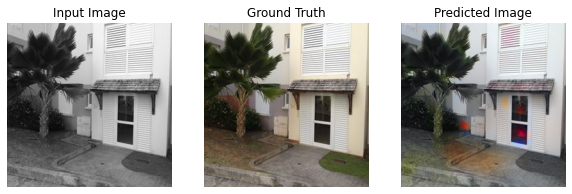



Epoch 13/20
----------
gen_loss: 6.1465, gan_loss: 0.9774, l1_loss: 0.0517, disc_loss: 0.6164.


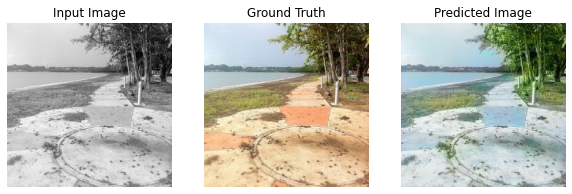



Epoch 14/20
----------
gen_loss: 5.9268, gan_loss: 0.9606, l1_loss: 0.0497, disc_loss: 0.6142.


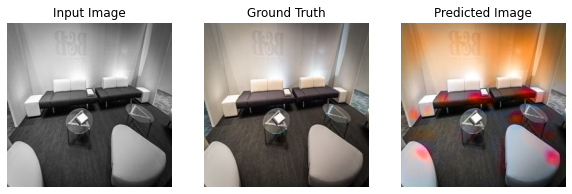



Epoch 15/20
----------
gen_loss: 5.9418, gan_loss: 0.9670, l1_loss: 0.0497, disc_loss: 0.6240.


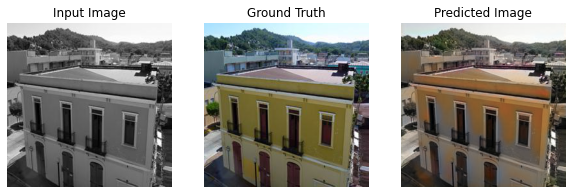



Epoch 16/20
----------
gen_loss: 5.7766, gan_loss: 0.9325, l1_loss: 0.0484, disc_loss: 0.6218.


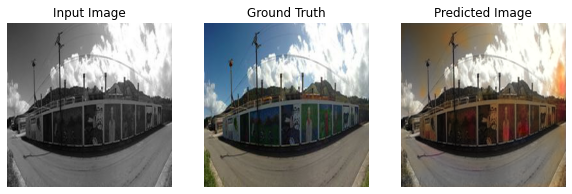



Epoch 17/20
----------
gen_loss: 5.7571, gan_loss: 0.9180, l1_loss: 0.0484, disc_loss: 0.6290.


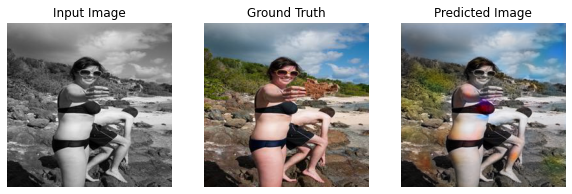



Epoch 18/20
----------
gen_loss: 5.6433, gan_loss: 0.9423, l1_loss: 0.0470, disc_loss: 0.6207.


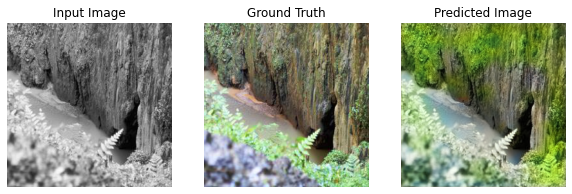



Epoch 19/20
----------
gen_loss: 5.5691, gan_loss: 0.9318, l1_loss: 0.0464, disc_loss: 0.6179.


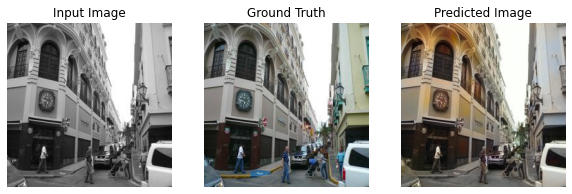



Epoch 20/20
----------
gen_loss: 5.5477, gan_loss: 0.9478, l1_loss: 0.0460, disc_loss: 0.6333.


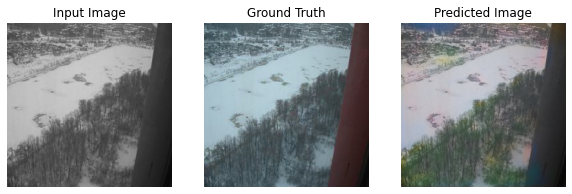

saving model weights ...


Training complete in 2m 32s


In [ ]:
history = utils.train(model = p2p, 
            n_epochs = 20, 
            display_step = 1, 
            save_step = 20,
            dataloaders = dataloaders, 
            filename = 'blackwhite_b33_notransfo',
            lr = 2e-4, 
            lbd = 100,
            betas = (0.5, 0.999)) 

In [ ]:
#plot losses and save losses images
utils.plot_and_save_history(history, filename = 'blackwhite_b53_notransfo', title = 'blackwhite_b53_notransfo')

## 3.4. Testing

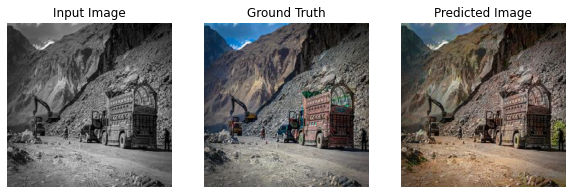

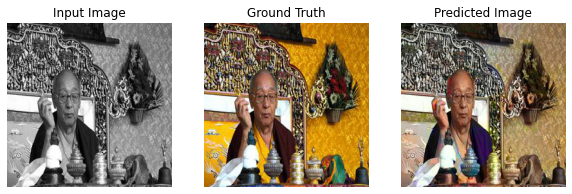

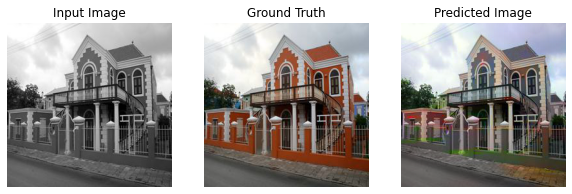

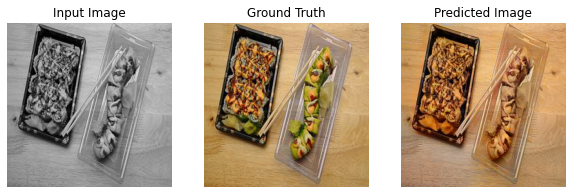

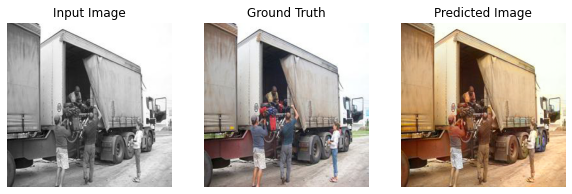

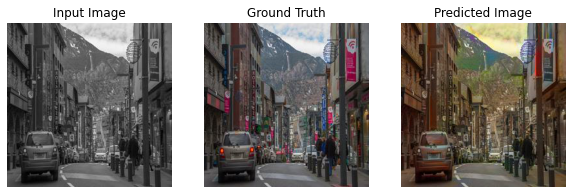

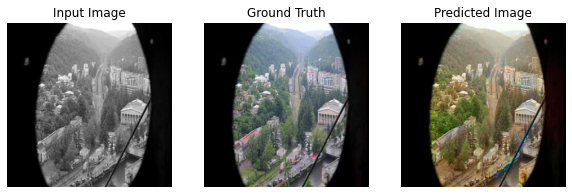

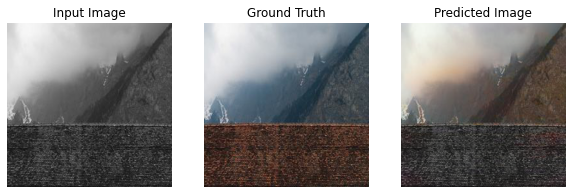

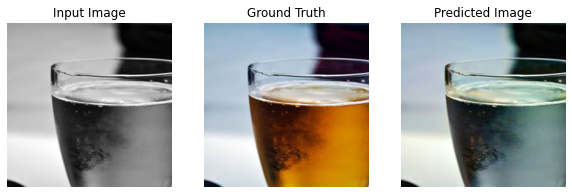

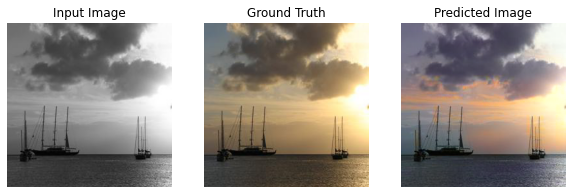

In [30]:
n = 10
i = 0
for input_val, real_val in dataloaders['val']:
    i += 1
    utils.generate_images(model = p2p, input = input_val, real = real_val)
    if i == n: break

# Compare models

Now, let's compare our different models.

In [6]:
#Loading old models
net_G = utils.build_res_unet(n_input=3, n_output=3, size=256)
net_G.load_state_dict(torch.load("weights/res18-unet.pt", map_location=utils.device))

net_G_2 = utils.build_res_unet(n_input=3, n_output=3, size=256)
net_G_2.load_state_dict(torch.load("weights/res18-unet.pt", map_location=utils.device))

#best model (20 epochs enhanced pix2pix)
p2p = model.Pix2Pix(generator = net_G).to(utils.device)
p2p.load_state_dict(torch.load("weights/blackwhite_b43_notransfo_ep10.pkl", map_location=utils.device))

#worse model (original pix2pix)
p2p0 = model.Pix2Pix().to(utils.device)
p2p0.load_state_dict(torch.load("weights/blackwhite_b32_notransfo_ep19.pkl", map_location=utils.device))

#second best model (10 epochs enhanced pix2pix)
p2p1 = model.Pix2Pix(generator = net_G_2).to(utils.device)
p2p1.load_state_dict(torch.load("weights/blackwhite_b33_notransfo_ep10.pkl", map_location=utils.device))

<All keys matched successfully>

## Image comparison

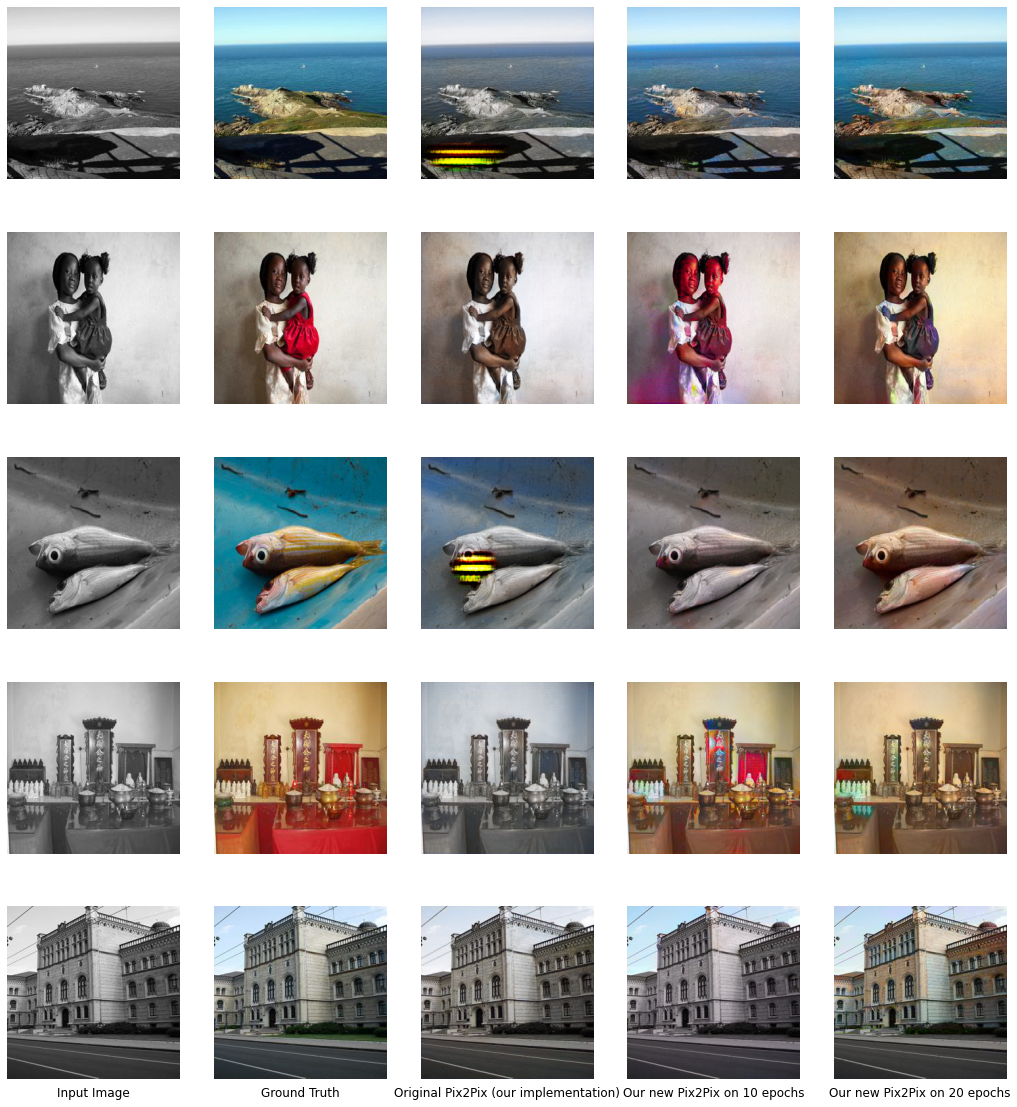

In [29]:
n = 5
i = 0
input_list = []
real_list = []
for input_val, real_val in dataloaders['val']:
    input_list.append(input_val)
    real_list.append(real_val)
    i += 1
    if i == n: break
utils.generate_images_multimodel(model_list = [p2p0, p2p1, p2p], input_list = input_list, real_list = real_list, forced_title = True)

## Color distribution comparison

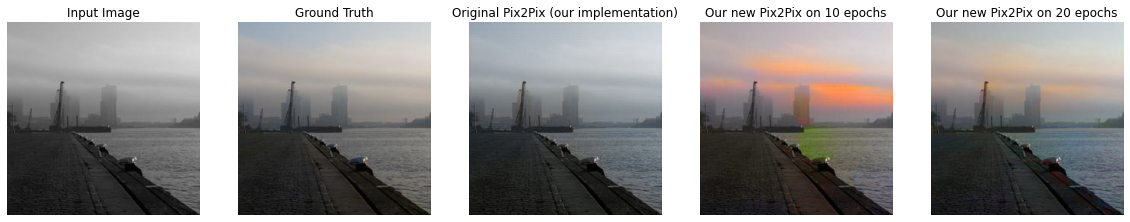

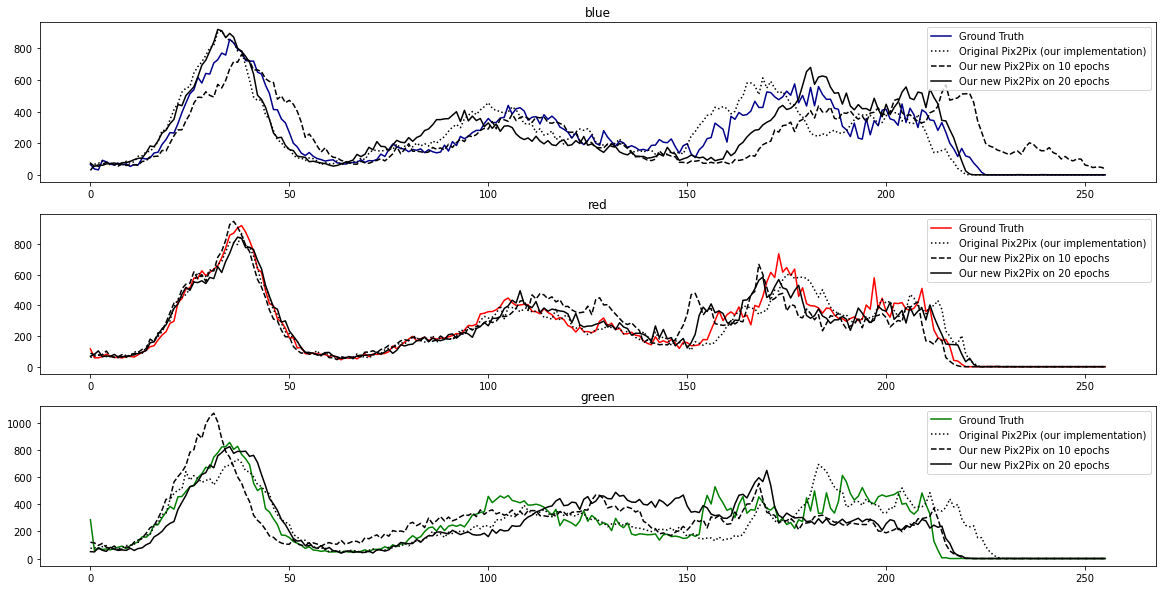

In [28]:
n = 1
i = 0
for input_val, real_val in dataloaders['val']:
    input_list.append(input_val)
    real_list.append(real_val)
    i += 1
    utils.generate_color_histogram(model_list = [p2p0, p2p1, p2p], input = input_val, real = real_val)
    if i == n: break